# Hierarichal Clustering Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt 

In [2]:
iris=datasets.load_iris()

In [4]:
iris_data=pd.DataFrame(iris.data)

In [5]:
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_data.columns=iris.feature_names

In [11]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_scaled=scaler.fit_transform(iris_data)

In [16]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)

In [19]:
pca_scaled=pca.fit_transform(X_scaled)

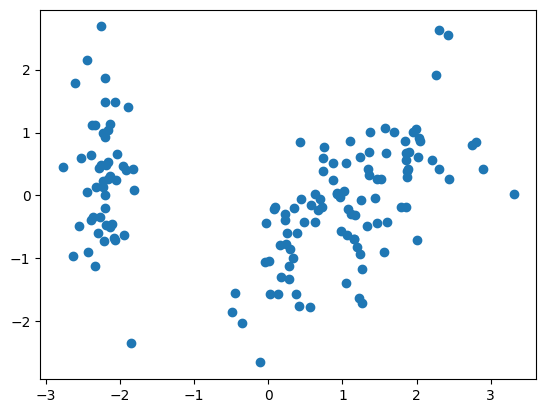

In [20]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [21]:
## Aglomerative Algorithms
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Euclidian Distance')

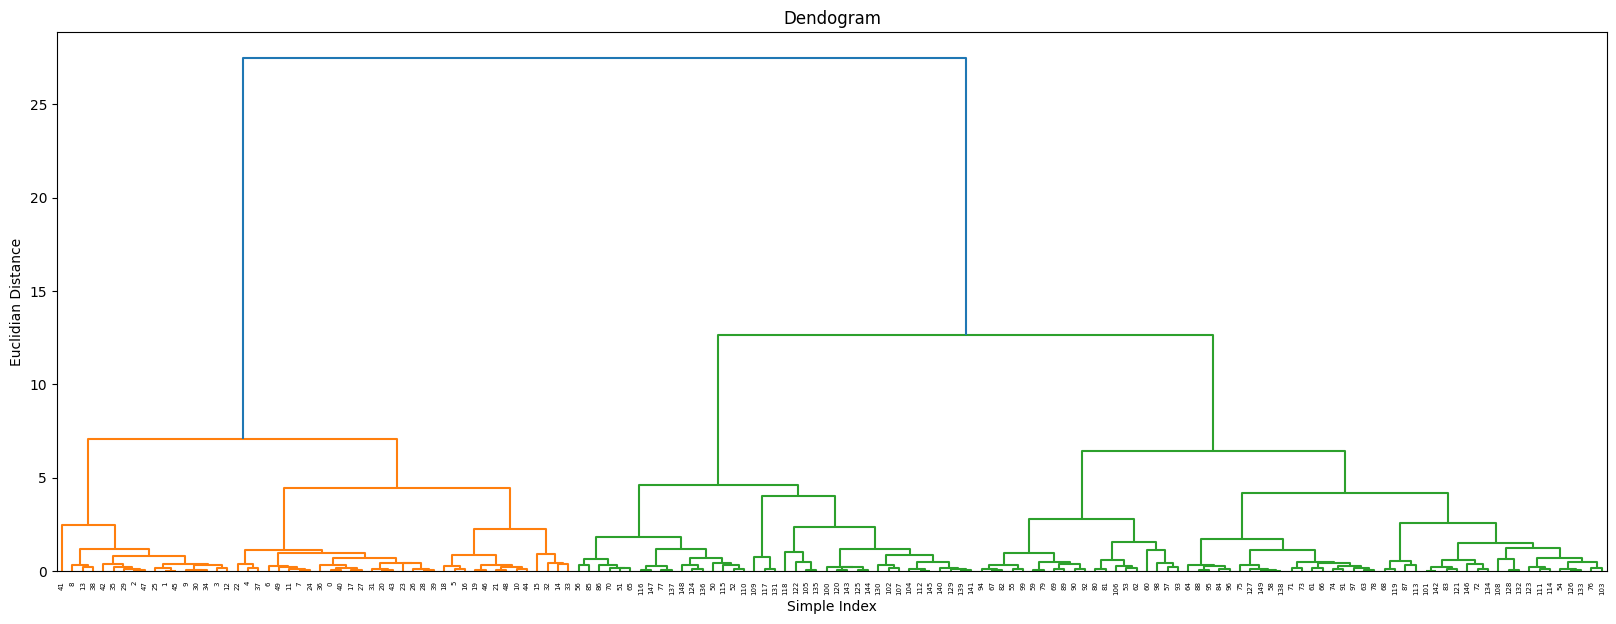

In [23]:
plt.figure(figsize=(20,7))
plt.title('Dendograms')

## Create Dendograms

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Simple Index')
plt.ylabel('Euclidian Distance')

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [35]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

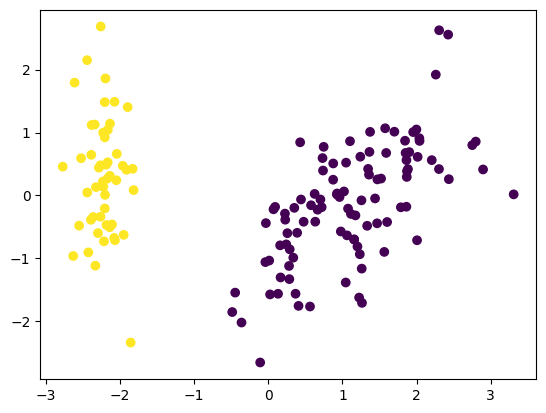

In [36]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [37]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [40]:
silhouette_coefficients=[]

for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled,agglo.labels_)
    silhouette_coefficients.append(score)


In [41]:
silhouette_coefficients

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

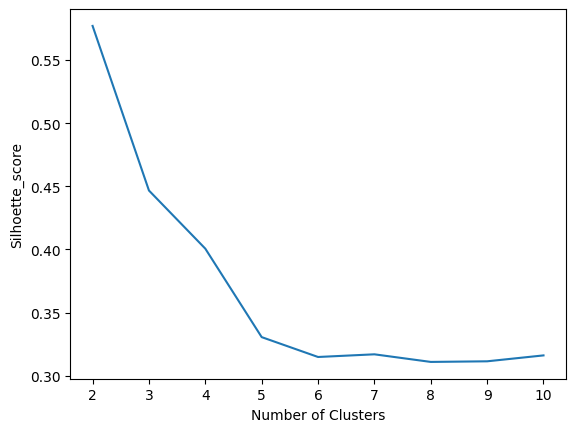

In [43]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoette_score')
plt.show()